<p style='direction:rtl; text-align: right'>ابتدا باید کتابخانه های زیر را وارد کنیم:
    <ul style='direction:rtl; text-align: right'>
        <li>numpy: برای کار با ماتریس ها</li>
        <li>matplotlib: برای رسم نمودار</li>
        <li>PCA: برای کاهش بعد</li>
        <li>OpenCV: برای کار با عکس</li>
        <li>special_ortho_group: برای تولید پایه اورتونرمال </li>
    </ul>
</p>

</p>
<p style='direction:rtl; text-align: right'>تذکر: اگر کتابخانه cv2 اجرا نشد باید آن را نصب کنید. در command prompt دستور زیر را اجرا کنید.
</p>
<p style='direction:rtl; text-align: right'> pip install opencv-python
</p>

In [1]:
!pip install opencv-python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import special_ortho_group as sog

<h1 style='direction:rtl; text-align: right'>
پروژه ۲: استفاده از کاهش بعد
</h1>

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۱: تولید دیتا با استفاده از پایه اورتونرمال
</h2>
<p style='direction:rtl; text-align: right'>    
    عملیات زیر را انجام دهید:
    <ul style='direction:rtl; text-align: right'>
        <li>ابتدا با استفاده از تابع np.zeros آلفا وکتور هایی با ابعاد dim و  N بسازید.</li>
        <li>سعی کنید متغیر آلفا وکتور را طوری پر کنید که به ازای هر اندیس از بعد صفر آن، آرایه ای از توزیع نرمال با میانگین ۰ و انحراف معیار i+1 قرار گیرد.</li>
        <li> بردار پایه V را با استفاده از تابع special_ortho_group.rvs(dim) بسازید.</li>
        <li> مشخص کنید که در ده مولفه اول چند درصد دیتا برای هر کدام از ماتریس ها حفظ شده اند. </li>
        <li> حال بردار زیر را تولید کنید و در alpha_v قرار دهید. </li>
        $$\alpha_1 V_1 + \alpha_2 V_2 + ... + \alpha_d V_d $$
    </ul>

In [3]:
dim = 20
N = 1000

alpha_vectors = np.zeros((N, dim))

for i in range(N):
    alpha_vectors[i] = np.random.normal(0, i + 1, dim)

V = sog.rvs(dim)
alpha_v = np.matmul(alpha_vectors, V)
print(alpha_v)

[[-2.58783596e-01 -3.19394623e-01 -7.11900860e-01 ...  1.01163400e+00
  -8.16915690e-01  4.93505295e-01]
 [-5.21411943e+00  1.13561332e+00  4.49229923e-01 ... -2.03005292e+00
  -1.11830076e+00  2.24423322e+00]
 [ 2.39086172e+00 -2.54842419e+00 -8.91137605e-01 ...  3.63210567e+00
   5.21698748e-01 -1.17860674e+00]
 ...
 [ 6.87853761e+02 -1.81071602e+03  5.94047252e+02 ...  1.20452124e+03
   1.87854012e+03 -2.25821590e+02]
 [ 1.04745256e+03  7.09797952e+02 -1.42169937e+03 ... -2.44358255e+02
   9.75646295e+02 -1.50392629e+03]
 [-7.31716734e+02  4.22424003e+02 -1.72587509e+03 ...  4.52970045e+02
   7.02430444e+02 -6.78485475e+02]]


<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۲:استفاده از PCA برای کاهش بعد
</h2>
<p style='direction:rtl; text-align: right'>    
    عملیات زیر را انجام دهید:
    <ul style='direction:rtl; text-align: right'>
        <li>ابتدا یک شیی از PCA بسازید.</li>
        <li>با استفاده از تابع fit موجود در شیی PCA عملیات pca را روی دیتا alpha_v انجام دهید.</li>
        <li> با استفاده از تابع components_ موجود در شیی pca بردار های تکین را مشاهده کنید.</li>
        <li> با استفاده از تابع explained_variance_ موجود در شیی pca مقدار های تکین را مشاهده کنید.</li>
    </ul>

In [4]:
pca = PCA()
pca.fit(alpha_v)
print(pca.components_)
print(pca.explained_variance_)




[[ 5.07147095e-01 -4.19525932e-01  8.74420627e-02 -1.32828839e-01
  -1.34664490e-01 -1.69301811e-01 -9.01862885e-02 -1.12403573e-01
  -5.14345774e-02  2.69142259e-01 -9.41836131e-02  4.95860076e-02
  -4.55911573e-02 -3.29703617e-02 -2.42126386e-02  3.84433374e-01
   2.23457748e-01 -8.09938507e-02  4.15130958e-01  8.46409883e-02]
 [ 2.68224331e-01  1.95789858e-01 -5.17337276e-01 -2.57891936e-01
  -5.46266015e-02  5.09205880e-01  5.94733650e-02  1.75603518e-01
   2.09094619e-01  2.50641621e-02 -3.01167804e-02  2.79309794e-01
  -9.54207009e-02 -1.40570431e-01  2.00638805e-01  2.21561898e-01
  -4.74522048e-02 -8.41449292e-02 -8.17736562e-02 -3.77893426e-02]
 [ 1.27287920e-01 -9.36285736e-02 -2.46108523e-01  1.48489415e-01
  -1.11685870e-01 -4.01725698e-01  1.45204667e-01  1.56013175e-01
   1.61480655e-01  1.57826656e-01 -4.32224537e-01  2.33805403e-01
  -1.74831784e-01  1.91249573e-01 -1.89564883e-01 -2.07116582e-01
  -4.61098707e-01 -6.16700157e-02 -4.65755682e-02 -1.26900545e-01]
 [-1.05

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۳: کاهش بعد به ۳ بعد
</h2>
    <ul style='direction:rtl; text-align: right'>
        <li>ابتدا یک شیی از PCA با ورودی n_components=3 بسازید.</li>
        <li>با استفاده از تابع fit موجود در شیی PCA عملیات pca را روی دیتا alpha_v انجام دهید.</li>
        <li> تابع explained_variance_ratio_ موجود در شیی pca درصد حفظ دیتا به ازای هر کدام از بعد ها را می دهد.</li>
    <li>با کاهش بعد به ۳، چند درصد از اطلاعات حفظ می شود؟</li>
    </ul>

In [5]:
pca = PCA(n_components = 3)
pca.fit(alpha_v)
print(str(100 * np.sum(pca.explained_variance_ratio_)) + " percent of data is preserved in 3 dimensions!")


19.280409728364166 percent of data is preserved in 3 dimensions!


برای حفظ ۹۰ درصد از اطلاعات به چند بعد نیاز داریم؟

In [6]:
min_dim = 0
for i in range(1, dim):
    pca = PCA(n_components = i)
    pca.fit(alpha_v)
    if (np.sum(pca.explained_variance_ratio_) >= 0.9):
        min_dim = i
        break
print("Almost " + str(100 * np.sum(pca.explained_variance_ratio_)) + " percent of data is preserved in at least " + str(min_dim) + " dimensions!")

Almost 92.78331487762554 percent of data is preserved in at least 18 dimensions!


# ####################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۱: خواندن فایل تصویر
</h2>
<p style='direction:rtl; text-align: right'>ابتدا فایل تصویری رنگی باکیفیتی را از گوگل دانلود کنید.</p>
<p style='direction:rtl; text-align: right'>با استفاده از تابع imread موجود در کتابخانه <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">OpenCV</a> عکس مربوطه را فراخوانی کنید:</p>

In [7]:
image1 = cv2.imread("deadpool.jpg")

<p style='direction:rtl; text-align: right'>عکس خوانده شده را به فرمت <a href="https://www.w3schools.com/colors/colors_rgb.asp">RGB</a> در می آوریم:</p>

In [8]:
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

<p style='direction:rtl; text-align: right'>
    همانطور که می بینید عکس خوانده شده به ازای هر پیکسل ۳ عدد دارد: بنابراین برای هر عکس رنگی x*y یک آرایه x*y*3 خواهیم داشت.</p>

In [9]:
dim = image.shape
print('Image shape =', dim)

Image shape = (1500, 2400, 3)


<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۲: نمایش تصویر
</h2>
<p style='direction:rtl; text-align: right'>با استفاده از تابع imshow موجود در <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/">matplotlib</a> تصویر خوانده شده را نمایش دهید:</p>

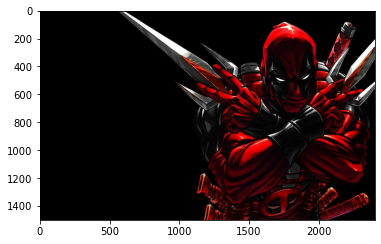

In [10]:
plt.imshow(image)
plt.show()

<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۳: آماده سازی تصویر برای کاهش بعد
</h2>
<p style='direction:rtl; text-align: right'>سه ماتریس رنگ را در ماتریس های R,G,B ذخیره کنید:</p>

In [11]:
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]
print(R.shape)
print(G.shape)
print(B.shape)

(1500, 2400)
(1500, 2400)
(1500, 2400)


<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۴:استفاده از PCA برای کاهش بعد
</h2>

<p style='direction:rtl; text-align: right'>    
با استفاده از کلاس PCA در کتابخانه sklearn کاهش بعد را انجام میدهیم.
    عملیات زیر را انجام دهید:
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">راهنمایی</a>
    <ul style='direction:rtl; text-align: right'>
        <li>برای هر یک از ماتریس های R,G,B یک شی PCA ایجاد کنید. تعداد مولفه ها را ۱۰ قرار دهید.</li>
        <li>با استفاده از تابع fit موجود در pca الگوریتم را روی ماتریس ها فیت کنید.</li>
        <li> با استفاده از دستور _explained_variance_ratio میتوانید ببینید هرکدام از مولفه ها چند درصد دیتای ماتریس را دارند. </li>
        <li> مشخص کنید که در ده مولفه اول چند درصد دیتا برای هر کدام از ماتریس ها حفظ شده اند. </li>
        <li> با استفاده از دستور bar مقادیر _explained_variance_ratio را رسم کنید </li> 
    </ul>

In [12]:
k = 10
rpca = PCA(n_components = k)
gpca = PCA(n_components = k)
bpca = PCA(n_components = k)

rpca.fit(R)
gpca.fit(G)
bpca.fit(B)

print("First " + str(k) + " components of Red Matrix have " + str(100 * np.sum(rpca.explained_variance_ratio_)) + " percent of data.")
print("First " + str(k) + " components of Green Matrix have " + str(100 * np.sum(gpca.explained_variance_ratio_)) + " percent of data.")
print("First " + str(k) + " components of Blue Matrix have " + str(100 * np.sum(bpca.explained_variance_ratio_)) + " percent of data.")

First 10 components of Red Matrix have 60.104936397737276 percent of data.
First 10 components of Green Matrix have 63.54553196104615 percent of data.
First 10 components of Blue Matrix have 63.89041945781745 percent of data.


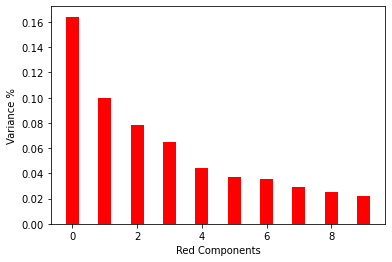

In [12]:
plt.bar([i for i in range(k)], rpca.explained_variance_ratio_, color ='red', width = 0.4)
plt.xlabel("Red Components")
plt.ylabel("Variance %")
plt.show()

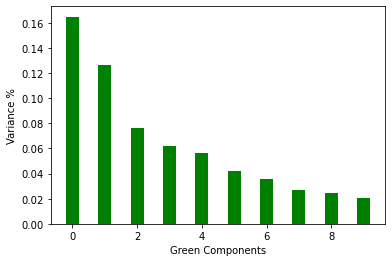

In [13]:

plt.bar([i for i in range(k)], gpca.explained_variance_ratio_, color ='green', width = 0.4)
plt.xlabel("Green Components")
plt.ylabel("Variance %")
plt.show()

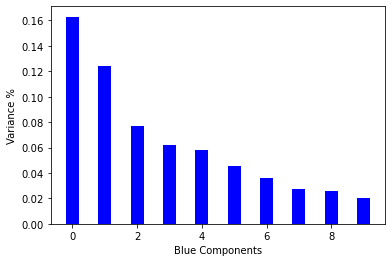

In [14]:
plt.bar([i for i in range(k)], bpca.explained_variance_ratio_, color ='blue', width = 0.4)
plt.xlabel("Blue Components")
plt.ylabel("Variance %")
plt.show()

<p style='direction:rtl; text-align: right'>عملیات زیر را انجام دهید:
    <ul style='direction:rtl; text-align: right'>
        <li>با استفاده از تابع transform موجود در pca دیتا با بعد کمتر را تولید کنید</li>
        <li> با استفاده از تابع inverse_transform دیتا را به بعد اولیه برگردانید </li>
    </ul>
</p>

In [15]:
Transform_R = rpca.transform(R)
Transform_B = gpca.transform(G)
Transform_G = bpca.transform(B)
Reduced_R = rpca.inverse_transform(Transform_R)
Reduced_G = gpca.inverse_transform(Transform_G)
Reduced_B = bpca.inverse_transform(Transform_B)

print('Transform Matrix Shape = ', Transform_R.shape)
print('Inverse Transform Matrix Shape = ', Reduced_R.shape)

Transform Matrix Shape =  (1500, 10)
Inverse Transform Matrix Shape =  (1500, 2400)


<p style='direction:rtl; text-align: right'>با استفاده از دستور concatenate سه ماتریس ً Reduced_R,Reduced_G,Reduced_B را کنار هم قرار دهید تا یک آرایه x*y*3 ایجاد شود. x , y همان ابعاد تصویر اولیه (image) هستند </p>
<p style='direction:rtl; text-align: right'>با استفاده از دستور astype ماتریس بدست آمده را به عدد صحیح تبدیل کنید.</p>

<p style='direction:rtl; text-align: right'>عکس بدست آمده را با imshow نمایش دهید.</p>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


final_image shape =  (1500, 2400, 3)


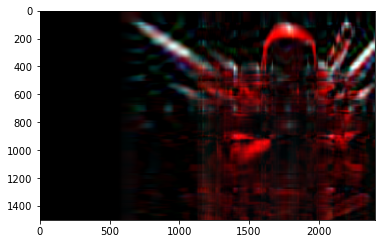

In [16]:
Reduced_R = Reduced_R.reshape((dim[0], dim[1], 1))
Reduced_G = Reduced_G.reshape((dim[0], dim[1], 1))
Reduced_B = Reduced_B.reshape((dim[0], dim[1], 1))

reduced_image = np.dstack((Reduced_R, Reduced_G, Reduced_B))
final_image = reduced_image.astype(int)
print('final_image shape = ', final_image.shape)
plt.imshow(final_image)
plt.show()

<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۵:استفاده از PCA برای کاهش بعد و حفظ ۹۹ درصد داده ها
</h2>

<p style='direction:rtl; text-align: right'> 
کل قسمت ۲.۴ را مجددا اجرا کنید. این بار تعداد مولفه ها را عددی قرار دهید که در هر سه ماتریس R,G,B حداقل ۹۹ درصد داده ها حفظ شود.
 

In [17]:
k = 188
rpca = PCA(n_components = k)
gpca = PCA(n_components = k)
bpca = PCA(n_components = k)

rpca.fit(R)
gpca.fit(G)
bpca.fit(B)

PCA(n_components=188)

In [18]:
Transform_R = rpca.transform(R)
Transform_B = gpca.transform(G)
Transform_G = bpca.transform(B)
Reduced_R = rpca.inverse_transform(Transform_R)
Reduced_G = gpca.inverse_transform(Transform_G)
Reduced_B = bpca.inverse_transform(Transform_B)

print('Transform Matrix Shape = ', Transform_R.shape)
print('Inverse Transform Matrix Shape = ', Reduced_R.shape)

Transform Matrix Shape =  (1500, 188)
Inverse Transform Matrix Shape =  (1500, 2400)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


final_image shape =  (1500, 2400, 3)


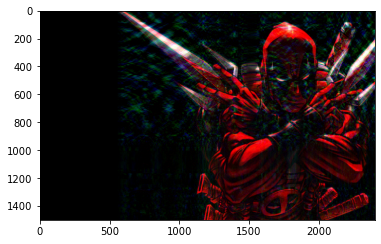

0.9885957181513506


In [19]:
Reduced_R = Reduced_R.reshape((dim[0], dim[1], 1))
Reduced_G = Reduced_G.reshape((dim[0], dim[1], 1))
Reduced_B = Reduced_B.reshape((dim[0], dim[1], 1))

reduced_image = np.dstack((Reduced_R, Reduced_G, Reduced_B))
final_image = reduced_image.astype(int)
print('final_image shape = ', final_image.shape)
plt.imshow(final_image)
plt.show()
print(np.sum(rpca.explained_variance_ratio_))